In [118]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [119]:
#options
pd.set_option('display.max_columns', 100)
sns.set_style('whitegrid')

In [120]:
#loading dataset
df = pd.read_csv('bank_data_prediction_task.csv',index_col=0)

D:\ANACONDA_TA\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [121]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,test_control_flag
1,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
4,25,services,single,high.school,no,yes,no,telephone,may,mon,50.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
5,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,146.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group


In [122]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,test_control_flag
41184,64,retired,divorced,professional.course,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,control group
41185,36,admin.,married,university.degree,no,no,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,control group
41186,29,unemployed,single,basic.4y,no,yes,no,NaN,NaN,NaN,NaN,NaN,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no,control group
41187,56,retired,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,control group
41188,74,retired,married,professional.course,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,control group


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 1 to 41188
Data columns (total 22 columns):
age                  41188 non-null int64
job                  41188 non-null object
marital              41188 non-null object
education            41188 non-null object
default              41188 non-null object
housing              41188 non-null object
loan                 41188 non-null object
contact              16476 non-null object
month                16476 non-null object
day_of_week          16476 non-null object
duration             16476 non-null float64
campaign             16476 non-null float64
pdays                41188 non-null int64
previous             41188 non-null int64
poutcome             41188 non-null object
emp.var.rate         41188 non-null float64
cons.price.idx       41075 non-null float64
cons.conf.idx        41188 non-null float64
euribor3m            41188 non-null float64
nr.employed          41188 non-null float64
y                    41188 

In [124]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,16476.000000,16476.00000,41188.000000,41188.000000,41188.000000,41075.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,259.678866,2.57957,962.475454,0.172963,0.081886,93.576356,-40.502600,3.621291,5167.035911
std,10.42125,263.942322,2.78453,186.910907,0.494901,1.570960,0.578342,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,104.000000,1.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,182.000000,2.00000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,320.000000,3.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,43.00000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [125]:
#target var
df['y'].value_counts()

no     37048
yes     4140
Name: y, dtype: int64

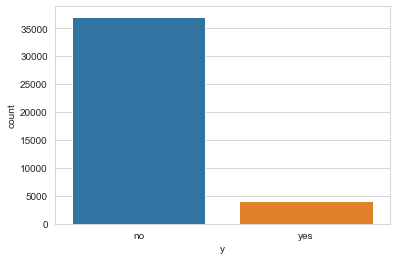

In [126]:
sns.countplot(df['y'])

In [127]:
df['test_control_flag'].value_counts()

control group     24712
campaign group    16476
Name: test_control_flag, dtype: int64

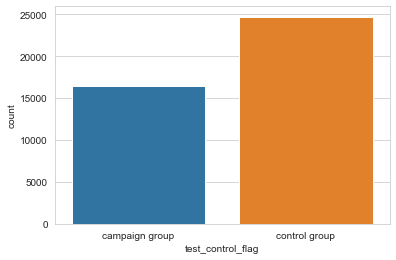

In [128]:
sns.countplot(df['test_control_flag'])

In [129]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'test_control_flag'],
      dtype='object')

In [130]:
target_var = df['y']

In [131]:
character_var = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'test_control_flag']

In [132]:
numerical_var = ['age','duration','campaign','pdays','previous','emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed']

In [133]:
#Character variables check

In [134]:
df[character_var].isnull().any()

job                  False
marital              False
education            False
default              False
housing              False
loan                 False
contact               True
month                 True
day_of_week           True
poutcome             False
test_control_flag    False
dtype: bool

In [135]:
df[character_var]['contact'].isnull().sum()

24712

In [136]:
df[character_var]['month'].isnull().sum()

24712

In [137]:
df[character_var]['day_of_week'].isnull().sum()

24712

In [138]:
#Drop for contact , month , day_of_week - too much NaNs

character_var = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'poutcome', 'test_control_flag']

In [139]:
df[character_var]['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [140]:
df[character_var]['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

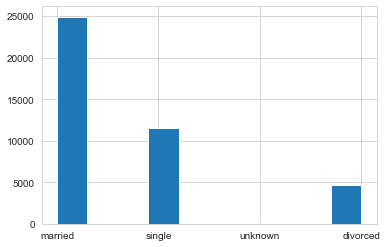

In [141]:
df[character_var]['marital'].hist()

In [142]:
df[character_var]['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [143]:
df[character_var]['default'].value_counts() 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [144]:
#Drop for default - no value from this variable 
character_var = ['job', 'marital', 'education', 'housing', 'loan',
                    'poutcome', 'test_control_flag']

In [145]:
df[character_var]['housing'].value_counts() 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

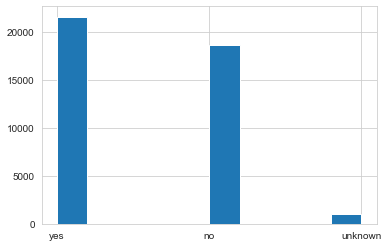

In [146]:
df[character_var]['housing'].hist()

In [147]:
df[character_var]['loan'].value_counts() 

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

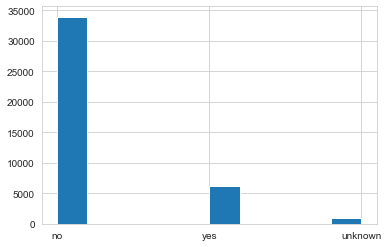

In [148]:
df[character_var]['loan'].hist()

In [149]:
df[character_var]['poutcome'].value_counts() 

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

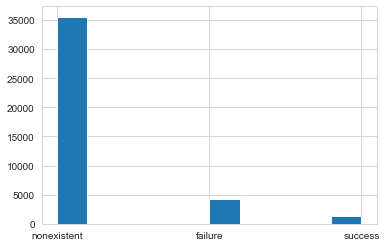

In [150]:
df[character_var]['poutcome'].hist()

In [151]:
df[character_var]['test_control_flag'].value_counts() 

control group     24712
campaign group    16476
Name: test_control_flag, dtype: int64

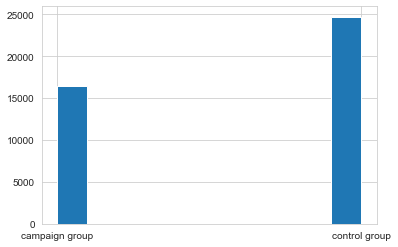

In [152]:
df[character_var]['test_control_flag'].hist()

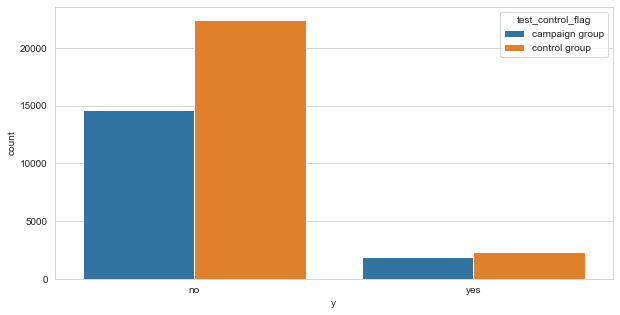

In [153]:
#target with test_control_flag

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='y',hue='test_control_flag')
plt.show()

In [154]:
character_var = ['job', 'marital', 'education', 'housing', 'loan','poutcome', 'test_control_flag']

In [155]:
df[character_var]

,job,marital,education,housing,loan,poutcome,test_control_flag
1,services,married,high.school,yes,no,nonexistent,campaign group
2,services,married,basic.9y,no,no,nonexistent,campaign group
3,admin.,married,professional.course,no,no,nonexistent,campaign group
4,services,single,high.school,yes,no,nonexistent,campaign group
5,blue-collar,married,basic.6y,yes,no,nonexistent,campaign group
...,...,...,...,...,...,...,...
41184,retired,divorced,professional.course,yes,no,nonexistent,control group
41185,admin.,married,university.degree,no,no,nonexistent,control group
41186,unemployed,single,basic.4y,yes,no,success,control group
41187,retired,married,university.degree,yes,no,nonexistent,control group


In [156]:
dummies = pd.get_dummies(df[character_var])

In [157]:
dummies = dummies.drop(labels=['job_unknown','marital_unknown','education_unknown','housing_unknown','loan_unknown'],axis=1)

In [158]:
type(dummies)

pandas.core.frame.DataFrame

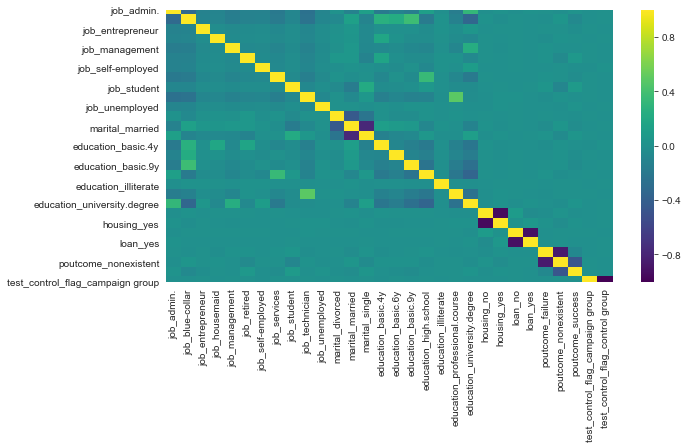

In [159]:
plt.figure(figsize=(10,5))
sns.heatmap(dummies.corr(),cmap='viridis')
plt.show()

In [160]:
df[numerical_var]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1,37,226.0,1.0,999,0,1.1,93.994,-36.4,4.857,5191.0
2,45,198.0,1.0,999,0,1.1,93.994,-36.4,4.857,5191.0
3,59,139.0,1.0,999,0,1.1,93.994,-36.4,4.857,5191.0
4,25,50.0,1.0,999,0,1.1,93.994,-36.4,4.857,5191.0
5,35,146.0,1.0,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41184,64,NaN,NaN,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,36,NaN,NaN,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,29,NaN,NaN,9,1,-1.1,94.767,-50.8,1.028,4963.6
41187,56,NaN,NaN,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [161]:
df[numerical_var].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,16476.000000,16476.00000,41188.000000,41188.000000,41188.000000,41075.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,259.678866,2.57957,962.475454,0.172963,0.081886,93.576356,-40.502600,3.621291,5167.035911
std,10.42125,263.942322,2.78453,186.910907,0.494901,1.570960,0.578342,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,104.000000,1.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,182.000000,2.00000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,320.000000,3.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,43.00000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [162]:
#Duration and campaign missing 60%
16476/41188

0.40001942313295136

In [163]:
#Droping duration and campaign
numerical_var = ['age','pdays','previous','emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed']

In [164]:
#pdays = 39673 value of '999' in another words almost 40k times (out of 411888) client was not contacted 

In [165]:
(df[numerical_var]['pdays']==999).sum()

39673

In [166]:
#Droping pdays
numerical_var = ['age','previous','emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed']

In [167]:
df[numerical_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 1 to 41188
Data columns (total 7 columns):
age               41188 non-null int64
previous          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41075 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
dtypes: float64(5), int64(2)
memory usage: 3.8 MB


In [168]:
#Cons.price.idx filling with mean
df['cons.price.idx'] = df[numerical_var]['cons.price.idx'].fillna(value=df[numerical_var]['cons.price.idx'].mean())

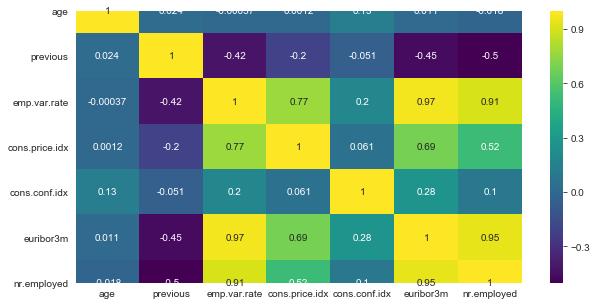

In [169]:
plt.figure(figsize=(10,5))
sns.heatmap(df[numerical_var].corr(),annot=True,cmap='viridis')
plt.show()

In [170]:
#Dropping highly correlated numeric variables euribor3m and emp_var_rate
numerical_var = ['age','previous', 'cons.price.idx','cons.conf.idx', 'nr.employed']

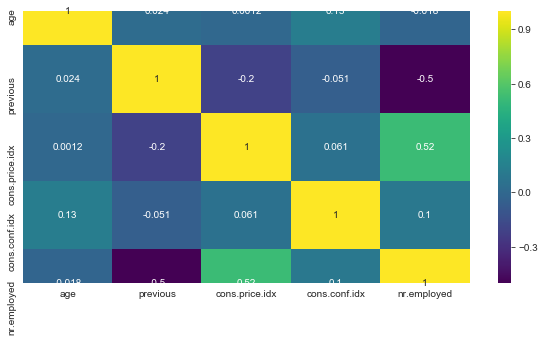

In [171]:
#No more highly correlated variables (0.6 >)
plt.figure(figsize=(10,5))
sns.heatmap(df[numerical_var].corr(),annot=True,cmap='viridis')
plt.show()

In [172]:
numerical_var = df[numerical_var]

In [173]:
numerical_var

,age,previous,cons.price.idx,cons.conf.idx,nr.employed
1,37,0,93.994,-36.4,5191.0
2,45,0,93.994,-36.4,5191.0
3,59,0,93.994,-36.4,5191.0
4,25,0,93.994,-36.4,5191.0
5,35,0,93.994,-36.4,5191.0
...,...,...,...,...,...
41184,64,0,94.767,-50.8,4963.6
41185,36,0,94.767,-50.8,4963.6
41186,29,1,94.767,-50.8,4963.6
41187,56,0,94.767,-50.8,4963.6


In [174]:
dummies

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,test_control_flag_campaign group,test_control_flag_control group
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0
5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1
41185,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1
41186,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1
41187,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1


In [175]:
#Concat numerical dataframe + dummies dataframe = final df

In [176]:
#target_var = target_var.replace(('yes', 'no'), (1, 0), inplace=True)

In [177]:
target_var = target_var.map(dict(yes=1, no=0))

In [178]:
target_var.value_counts()

0    37048
1     4140
Name: y, dtype: int64

In [179]:
#Final dataframe with target variable, numerical vars and character
df = pd.concat([target_var.reset_index(drop=True),numerical_var.reset_index(drop=True),dummies.reset_index(drop=True)], axis=1)

In [180]:
df

,y,age,previous,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,test_control_flag_campaign group,test_control_flag_control group
0,0,37,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0
1,0,45,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0
2,0,59,0,93.994,-36.4,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0
3,0,25,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0
4,0,35,0,93.994,-36.4,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,64,0,94.767,-50.8,4963.6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1
41184,0,36,0,94.767,-50.8,4963.6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1
41185,0,29,1,94.767,-50.8,4963.6,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1
41186,0,56,0,94.767,-50.8,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1


In [181]:
#MODELING PART

In [182]:
y = df[['y']]

In [183]:
X = df.drop(labels=['y','test_control_flag_control group'],axis=1)

In [184]:
X.columns

Index(['age', 'previous', 'cons.price.idx', 'cons.conf.idx', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'test_control_flag_campaign group'],
      dtype='object')

In [185]:
X = X.drop(labels=['loan_no','housing_no'],axis=1)

In [186]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,0
41184,0
41185,0
41186,0


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [188]:
#LOGISTIC REGRESSION
logisticRegr = LogisticRegression(solver='lbfgs')

In [189]:
logisticRegr.fit(X_train, y_train)

D:\ANACONDA_TA\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA_TA\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
predictions = logisticRegr.predict(X_test)

In [191]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9031318281136198


In [192]:
print(confusion_matrix(y_test,predictions))

[[7308   97]
 [ 701  132]]


In [193]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7405
           1       0.58      0.16      0.25       833

    accuracy                           0.90      8238
   macro avg       0.74      0.57      0.60      8238
weighted avg       0.88      0.90      0.88      8238



In [194]:
#AUC
roc_auc_score(y_test, predictions)

0.5726820640477663

In [195]:
#RANDOM FOREST

In [196]:
model = RandomForestClassifier(n_estimators=100)

In [197]:
model.fit(X_train, y_train)

D:\ANACONDA_TA\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [198]:
rf_predictions = model.predict(X_test)

In [199]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7405
           1       0.40      0.24      0.30       833

    accuracy                           0.89      8238
   macro avg       0.66      0.60      0.62      8238
weighted avg       0.87      0.89      0.87      8238



In [200]:
#AUC
roc_auc_score(y_test, rf_predictions)

0.6004591978587518

In [201]:
rf_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [202]:
#KNN

In [203]:
knn = KNeighborsClassifier(n_neighbors=30)

In [204]:
knn.fit(X_train, y_train)

D:\ANACONDA_TA\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [205]:
y_pred = knn.predict(X_test)

In [206]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7405
           1       0.52      0.10      0.17       833

    accuracy                           0.90      8238
   macro avg       0.72      0.55      0.56      8238
weighted avg       0.87      0.90      0.87      8238



In [207]:
roc_auc_score(y_test, y_pred)

0.5468866547294137

In [208]:
#AFTER MODELING 

In [209]:
len(predictions)

8238

In [210]:
predictions = predictions.reshape(8238,1)

In [211]:
predictions = pd.DataFrame(data=predictions,columns=['Subscription'])

In [212]:
predictions['Subscription'].value_counts()

0    8009
1     229
Name: Subscription, dtype: int64

In [213]:
X_test = X_test.reset_index()

In [214]:
X_test['Subscription'] = predictions['Subscription']

In [215]:
X_test

,index,age,previous,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,test_control_flag_campaign group,Subscription
0,3669,58,0,94.465,-41.8,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0
1,20131,31,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
2,2492,44,0,93.994,-36.4,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,14088,25,0,92.893,-46.2,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0
4,34986,45,0,92.893,-46.2,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,21321,41,0,94.465,-41.8,5228.1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
8234,6295,38,0,93.918,-42.7,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
8235,3627,41,0,94.465,-41.8,5228.1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
8236,27617,28,0,93.918,-42.7,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0


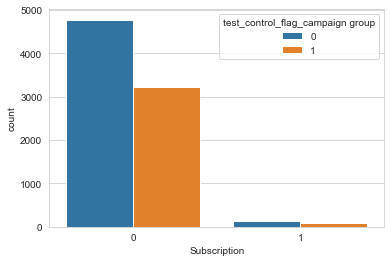

In [216]:
sns.countplot(data=X_test,x=X_test['Subscription'],hue ='test_control_flag_campaign group' )

In [217]:
X_test['Subscription'].value_counts()

0    8009
1     229
Name: Subscription, dtype: int64

In [218]:
X_test.columns

Index(['index', 'age', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'housing_yes', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'test_control_flag_campaign group', 'Subscription'],
      dtype='object')

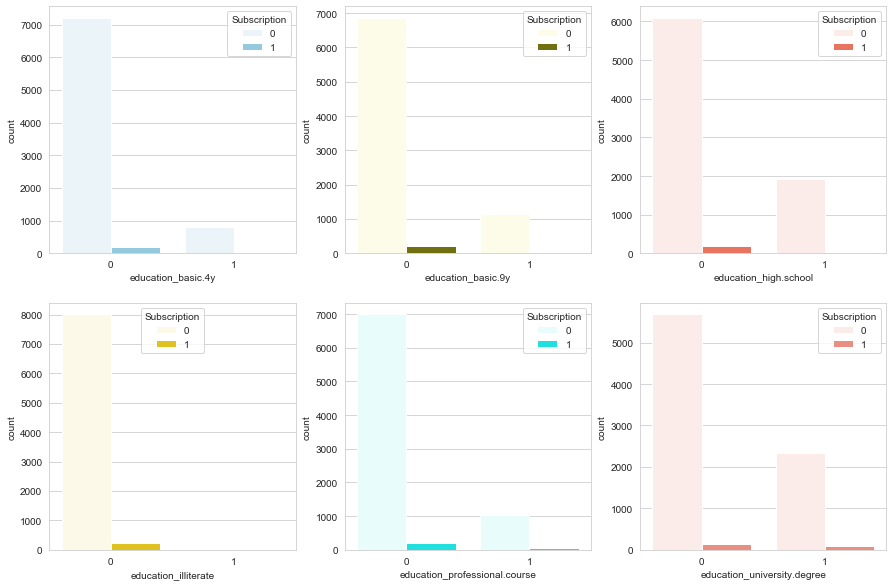

In [219]:
#Education analysis - people on "low" educational level (basic - 4y and 9y, high school,illiterate) will probably not subscribe after marketing campaign
# whereas people with professional courses or with university degree are likely to subscribe (university degree probabilty > professional courses)

f, axes = plt.subplots(2, 3,figsize=(15,10), sharex=False)
sns.countplot(data=X_test,x= X_test["education_basic.4y"] , color="skyblue",hue='Subscription', ax=axes[0, 0])
sns.countplot(data=X_test,x= X_test["education_basic.9y"] , color="olive",hue='Subscription', ax=axes[0, 1])
sns.countplot(data=X_test,x= X_test["education_high.school"] , color="tomato",hue='Subscription', ax=axes[0, 2])
sns.countplot(data=X_test,x= X_test["education_illiterate"] , color="gold",hue='Subscription', ax=axes[1, 0])
sns.countplot(data=X_test,x= X_test["education_professional.course"] , color="cyan",hue='Subscription', ax=axes[1, 1])
sns.countplot(data=X_test,x= X_test["education_university.degree"] , color="salmon",hue='Subscription', ax=axes[1, 2])
plt.show()

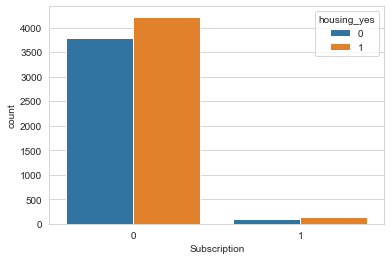

In [220]:
#there is high probabilty that if a person has housing loan that he will subscribe
sns.countplot(data=X_test,x=X_test['Subscription'],hue ='housing_yes' )

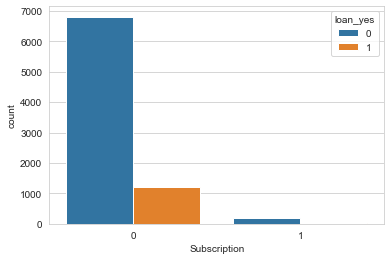

In [221]:
#there is high probabilty that if a person has personal loan he won't subscribe
sns.countplot(data=X_test,x=X_test['Subscription'],hue ='loan_yes' )

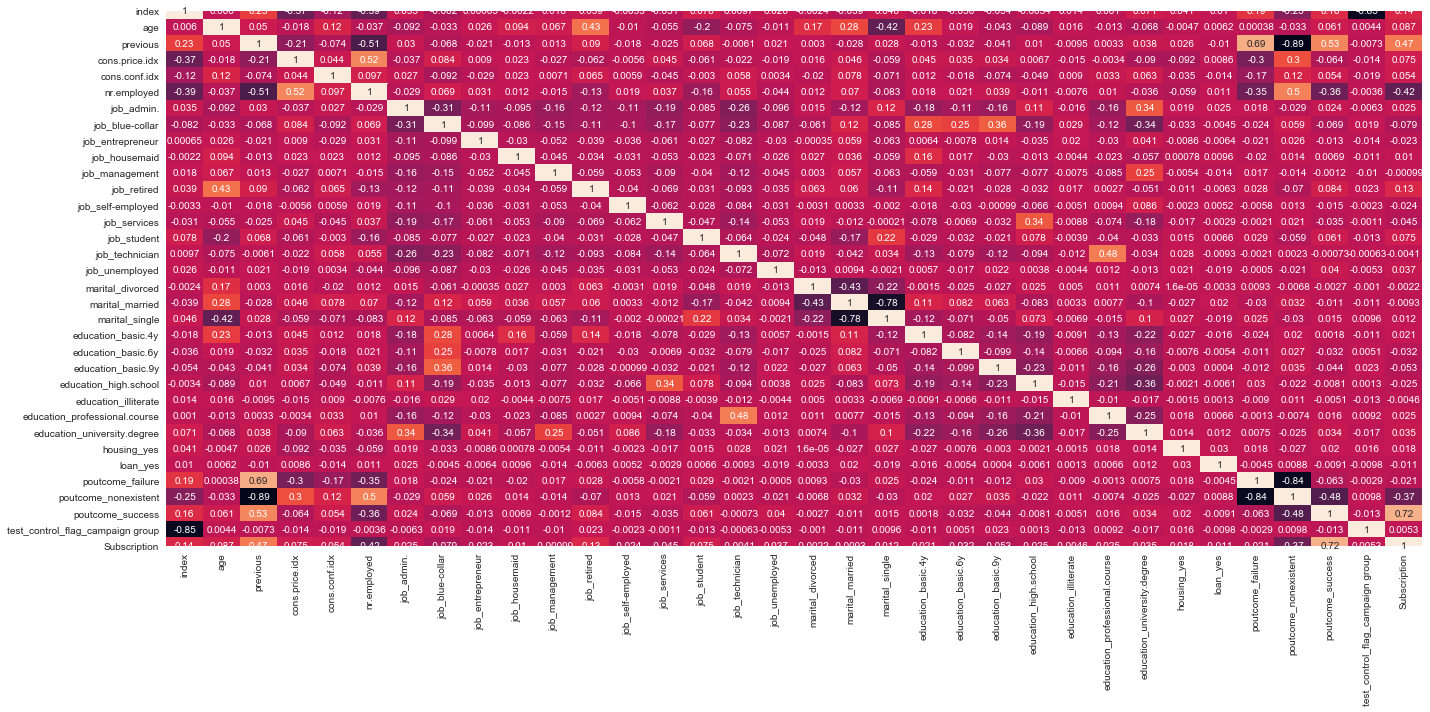

In [222]:

plt.figure(figsize=(20,10))
sns.heatmap(X_test.corr(),annot=True,cbar=False)
plt.tight_layout()
plt.show()

In [223]:
#Zoomin to see results of Heatmap
#Poutcome_success (0,72) , previous (0,47) , nr_employed (-0,42) 

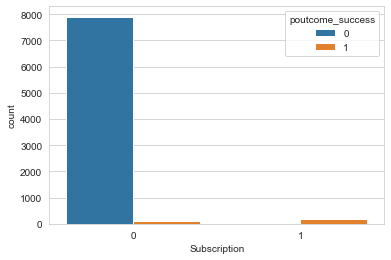

In [224]:
#if the previous marketing campaign suceed for a client there is high probability that he will also subscribe after future campaings (but not all)
sns.countplot(data=X_test,x=X_test['Subscription'],hue='poutcome_success')

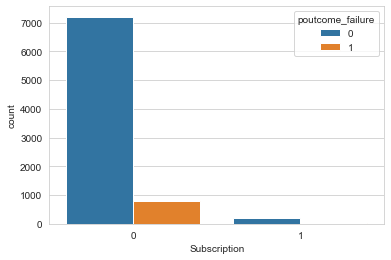

In [225]:
#if the previous marketing campaign failed for a client there is huge probabilty that it will fail (they won't subscribe in a future)
sns.countplot(data=X_test,x=X_test['Subscription'],hue='poutcome_failure')

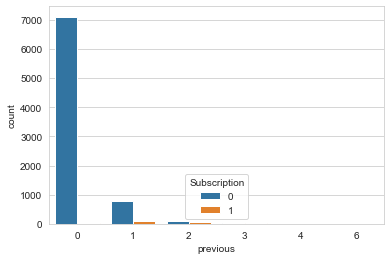

In [226]:
#if the client was previously contacted it has more chance to be a subscriber than someone who wasn't contacted at all
sns.countplot(data=X_test,x=X_test['previous'],hue='Subscription')

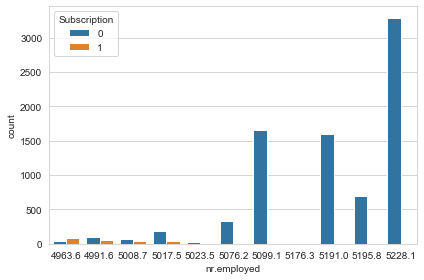

In [227]:
#When the company was smaller (less employees) the subscription rate was signitficantly higher 

sns.countplot(data=X_test,x=X_test['nr.employed'],hue='Subscription')
plt.tight_layout()

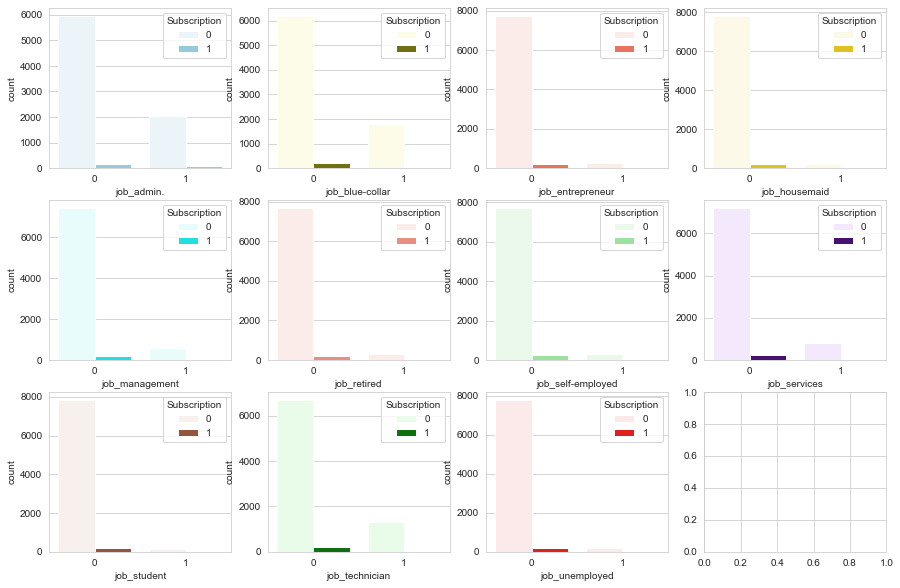

In [228]:
#Job analysis - when it comes to a job influence on subscription only ADMIN job has some subscribers

f, axes = plt.subplots(3, 4,figsize=(15,10), sharex=False)

sns.countplot(data=X_test,x= X_test['job_admin.'] , color="skyblue",hue='Subscription', ax=axes[0, 0])
sns.countplot(data=X_test,x= X_test['job_blue-collar'] , color="olive",hue='Subscription', ax=axes[0, 1])
sns.countplot(data=X_test,x= X_test['job_entrepreneur'] , color="tomato",hue='Subscription', ax=axes[0, 2])
sns.countplot(data=X_test,x= X_test['job_housemaid'] , color="gold",hue='Subscription', ax=axes[0, 3])
sns.countplot(data=X_test,x= X_test['job_management'] , color="cyan",hue='Subscription', ax=axes[1, 0])
sns.countplot(data=X_test,x= X_test['job_retired'] , color="salmon",hue='Subscription', ax=axes[1, 1])
sns.countplot(data=X_test,x= X_test['job_self-employed'] , color="lightgreen",hue='Subscription', ax=axes[1, 2])
sns.countplot(data=X_test,x= X_test['job_services'] , color="indigo",hue='Subscription', ax=axes[1, 3])
sns.countplot(data=X_test,x= X_test['job_student'] , color="sienna",hue='Subscription', ax=axes[2, 0])
sns.countplot(data=X_test,x= X_test['job_technician'] , color="green",hue='Subscription', ax=axes[2, 1])
sns.countplot(data=X_test,x= X_test['job_unemployed'] , color="red",hue='Subscription', ax=axes[2, 2])

plt.show()

In [229]:
#sns.scatterplot(data=X_test,x=X_test['cons.price.idx'],y=X_test['cons.conf.idx'],hue='Subscription')

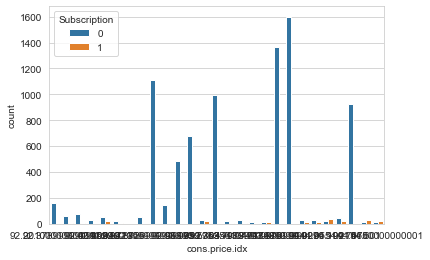

In [230]:
#if consumer price index is higher than its more likely that people will subscribe
sns.countplot(data=X_test,x=X_test['cons.price.idx'],hue='Subscription')

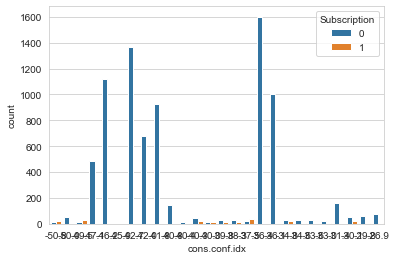

In [231]:
sns.countplot(data=X_test,x=X_test['cons.conf.idx'],hue='Subscription')

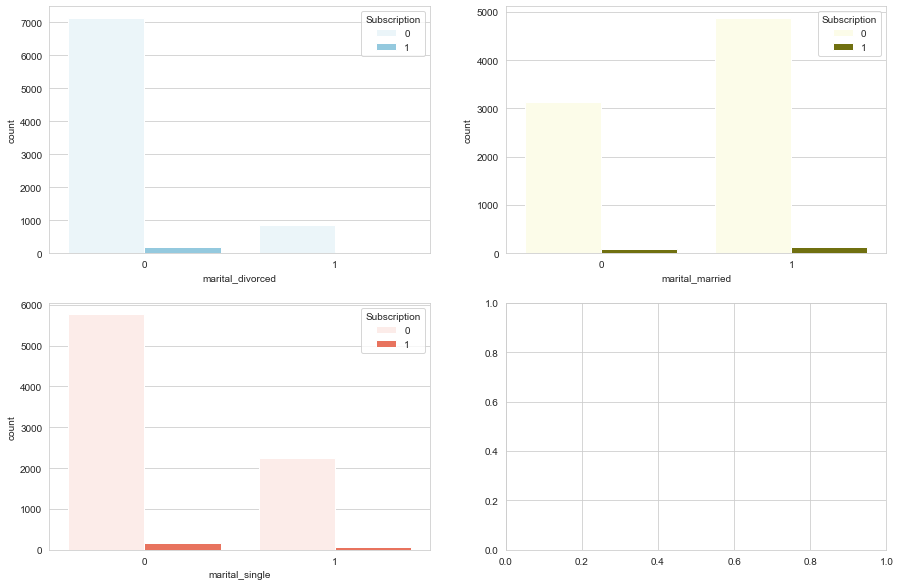

In [232]:
#Maritial status analysis - if divorced they are less likely 
#to make a subscription, also married are more likely then singles one 


f, axes = plt.subplots(2, 2,figsize=(15,10), sharex=False)
sns.countplot(data=X_test,x= X_test['marital_divorced'] , color="skyblue",hue='Subscription', ax=axes[0, 0])
sns.countplot(data=X_test,x= X_test['marital_married'] , color="olive",hue='Subscription', ax=axes[0, 1])
sns.countplot(data=X_test,x= X_test['marital_single'] , color="tomato",hue='Subscription', ax=axes[1, 0])
plt.show()

In [233]:
X_test['age'].where(X_test['Subscription']==1).dropna()

10      52.0
30      64.0
32      28.0
61      33.0
67      36.0
        ... 
8096    22.0
8151    57.0
8155    29.0
8158    25.0
8223    33.0
Name: age, Length: 229, dtype: float64

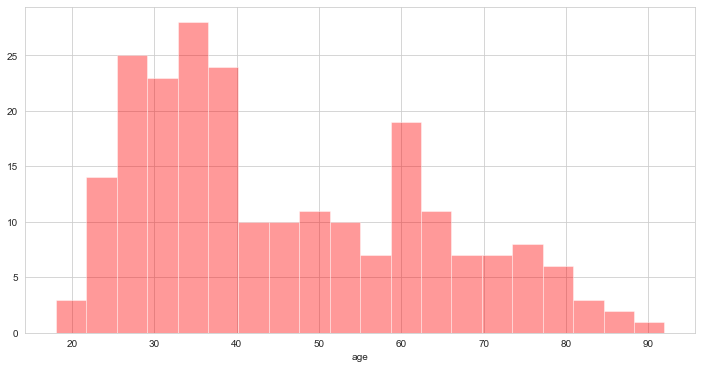

In [234]:
#Age of people who deposited term subscription - the most subscriptions were bought by 20 - 40 years old people (younger) there is also
# high peak at 60 years old
plt.figure(figsize=(12,6))
sns.distplot(X_test['age'].where(X_test['Subscription']==1).dropna(),bins=20,kde=False,color='red')
plt.show()